# Setup google drive
---

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
project_path = '/gdrive/My Drive/Colab Notebooks/pneumonia'
%cd '/gdrive/My Drive/Colab Notebooks/pneumonia'

/gdrive/My Drive/Colab Notebooks/pneumonia


In [3]:
!ls

 in   out  'Reconocer pneumonia.ipynb'


# Libraries

In [4]:
import numpy as np
import os
import PIL
import PIL.Image
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import pathlib
import random

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Code

In [6]:
dataset_folder_path = project_path + "/in/images-dataset"

normal_dataset_name = "NORMAL"
pneumonia_dataset_name = "Viral Pneumonia"
covid_dataset_name = "COVID-19"

In [7]:
def create_nn_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(512, 512)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(512, activation=tf.nn.relu))
  model.add(layers.Dense(256, activation=tf.nn.relu))
  model.add(layers.Dense(128, activation=tf.nn.relu))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3, activation=tf.nn.softmax))

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [8]:
nn_model = create_nn_model()

In [9]:
data_dir = pathlib.Path(dataset_folder_path)

In [10]:
normal_dataset_name

'NORMAL'

In [11]:
normal_images_paths = list(data_dir.glob(normal_dataset_name + '/*'))
pneumonia_images_paths = list(data_dir.glob(pneumonia_dataset_name + '/*'))
covid_images_paths = list(data_dir.glob(covid_dataset_name + '/*'))

In [12]:
def create_images_dataframe(images_path, tag):
    items = [];
    
    for image_path in images_path:
      image = keras.preprocessing.image.load_img(
          image_path, color_mode='grayscale', target_size=(512, 512),
          interpolation='nearest'
      )

      image = keras.preprocessing.image.img_to_array(image)
      image = np.reshape(image, (512, 512))
      item = [(image, tag)]
      items = items + item

    return items

In [13]:
normal_dataset = create_images_dataframe(normal_images_paths, 0)

In [15]:
pneumonia_dataset = create_images_dataframe(pneumonia_images_paths, 1)

In [16]:
covid_dataset = create_images_dataframe(covid_images_paths, 2)

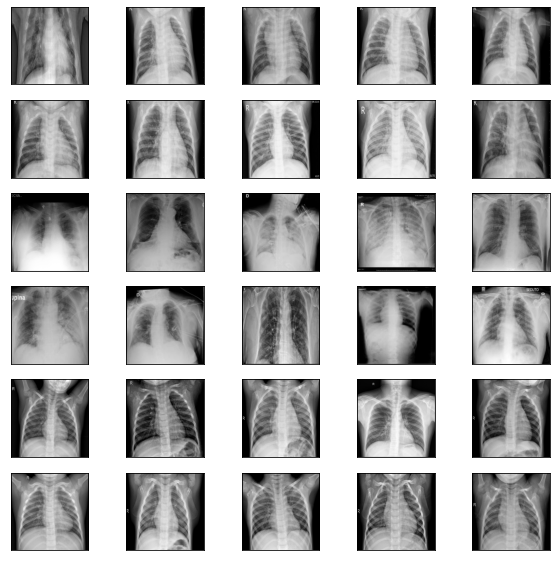

In [17]:
plt.figure(figsize=(10, 10))

for i in range(30):
  plt.subplot(6,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  if i < 10:
    plt.imshow(pneumonia_dataset[i][0], cmap="gray")
  elif i >= 10 and i < 20:
    plt.imshow(covid_dataset[i][0], cmap="gray")
  else:
    plt.imshow(normal_dataset[i][0], cmap="gray")

In [18]:
len(covid_dataset)

1419

In [19]:
complete_dataset = normal_dataset + pneumonia_dataset + covid_dataset
random.shuffle(complete_dataset)

X = [i[0] for i in complete_dataset] 
y = [i[1] for i in complete_dataset] 

In [20]:
print(len(X))

3176


In [21]:
X_train, X_test, y_train, y_test = X[:2540], X[2540:], y[:2540], y[2540:]

In [22]:
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [23]:
print(len(X_train))
print(len(y_train))

2540
2540


In [24]:
X_train.shape

(2540, 512, 512)

In [25]:
nn_model.fit(X_train, y_train, epochs=16)

Epoch 1/16
80/80 [==============================] - 6s 48ms/step - loss: 0.5644 - accuracy: 0.7827
Epoch 2/16
80/80 [==============================] - 4s 48ms/step - loss: 0.3137 - accuracy: 0.8753
Epoch 3/16
80/80 [==============================] - 4s 47ms/step - loss: 0.2696 - accuracy: 0.9007
Epoch 4/16
80/80 [==============================] - 4s 47ms/step - loss: 0.2215 - accuracy: 0.9209
Epoch 5/16
80/80 [==============================] - 4s 47ms/step - loss: 0.1631 - accuracy: 0.9416
Epoch 6/16
80/80 [==============================] - 4s 47ms/step - loss: 0.1148 - accuracy: 0.9497
Epoch 7/16
80/80 [==============================] - 4s 47ms/step - loss: 0.1288 - accuracy: 0.9538
Epoch 8/16
80/80 [==============================] - 4s 46ms/step - loss: 0.1464 - accuracy: 0.9510
Epoch 9/16
80/80 [==============================] - 4s 47ms/step - loss: 0.0939 - accuracy: 0.9660
Epoch 10/16
80/80 [==============================] - 4s 47ms/step - loss: 0.0868 - accuracy: 0.9711
Epoch 11/

In [26]:
test_loss, test_acc = nn_model.evaluate(X_test, y_test)
print("Accuracy: ", test_acc)

20/20 [==============================] - 1s 18ms/step - loss: 0.2028 - accuracy: 0.9387
Accuracy:  0.9386792182922363


In [46]:
nn_model.save(project_path + "/out")

INFO:tensorflow:Assets written to: /gdrive/My Drive/Colab Notebooks/pneumonia/out/assets


In [47]:
nn_model2 = keras.models.load_model(project_path + "/out/" )

In [48]:
normal_test_path = normal_images_paths[random.randrange(0, 200)]
normal_image_test = keras.preprocessing.image.load_img(
    normal_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

normal_image_test = keras.preprocessing.image.img_to_array(normal_image_test)
normal_image_test = np.reshape(normal_image_test, (512, 512))

In [49]:
pneumonia_test_path = pneumonia_images_paths[random.randrange(0, 200)]
pneumonia_image_test = keras.preprocessing.image.load_img(
    pneumonia_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

pneumonia_image_test = keras.preprocessing.image.img_to_array(pneumonia_image_test)
pneumonia_image_test = np.reshape(pneumonia_image_test, (512, 512))

In [50]:
covid_test_path = covid_images_paths[random.randrange(0, 200)]
covid_image_test = keras.preprocessing.image.load_img(
    covid_test_path, color_mode='grayscale', target_size=(512, 512),
    interpolation='nearest'
)

covid_image_test = keras.preprocessing.image.img_to_array(covid_image_test)
covid_image_test = np.reshape(covid_image_test, (512, 512))

In [ ]:
#Should to print normal
predict = nn_model2.predict(np.array([normal_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(normal_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

In [ ]:
#Should to print pneumonia
predict = nn_model2.predict(np.array([pneumonia_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(pneumonia_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

In [ ]:
#Should to print covid
predict = nn_model2.predict(np.array([covid_image_test]))
plt.figure(figsize=(10, 10))
plt.imshow(covid_image_test, cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Normal")
elif np.argmax(predict[0]) == 1:
  print("Pneumonia")
else:
  print("Covid")

In [ ]:
image_index = random.randrange(0, 200)
predict = nn_model.predict(np.array([X_test[image_index]]))

plt.figure(figsize=(10, 10))
plt.imshow(X_test[image_index], cmap="gray")

if np.argmax(predict[0]) == 0:
  print("Prediction: Normal")
elif np.argmax(predict[0]) == 1:
  print("Prediction: Pneumonia")
else:
  print("Prediction: Covid")

if y_test[image_index] == 0:
  print("Real: Normal")
elif y_test[image_index] == 1:
  print("Real: Pneumonia")
else:
  print("Real: Covid")
